In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### importation de  la donnée de prédictions

In [2]:
attrition_pred_init = pd.read_csv('/home/apprenant/PycharmProjects/Brief-10-Employees-Turnover/data/attrition_test.csv')
attrition_train_init = pd.read_csv('/home/apprenant/PycharmProjects/Brief-10-Employees-Turnover/data/attrition_train.csv')

In [3]:
attrition_pred = attrition_pred_init.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis =1)
attrition_train = attrition_train_init.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis =1)

### encodage des données catégorielles

In [4]:
attrition_train["OverTime"] = attrition_train["OverTime"].map(dict(Yes=1, No=0)).astype('int64')

attrition_train["Gender"] = attrition_train["Gender"].map(dict(Male=1, Female=0)).astype('int64')

In [5]:
attrition_pred["OverTime"] = attrition_pred["OverTime"].map(dict(Yes=1, No=0)).astype('int64')

attrition_pred["Gender"] = attrition_pred["Gender"].map(dict(Male=1, Female=0)).astype('int64')

In [6]:
cat_vars = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list2 = 'var'+'_'+var
    
    cat_list = pd.get_dummies(attrition_pred[var], prefix=var)
    data = attrition_pred.join(cat_list)
    
    cat_list2 = pd.get_dummies(attrition_train[var], prefix=var)
    data2 = attrition_train.join(cat_list2)
    
    attrition_pred = data
    attrition_train = data2

In [7]:
attrition_pred = attrition_pred.drop(cat_vars, axis=1)
attrition_pred = attrition_pred.drop('index1', axis=1)

attrition_train = attrition_train.drop(cat_vars, axis=1)

In [8]:
# data_pred_columns_list = attrition_pred.columns

In [9]:
data_pred_columns_list =['DistanceFromHome', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'EducationField_Other', 'JobRole_Healthcare Representative',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married']

### modification de la donnée

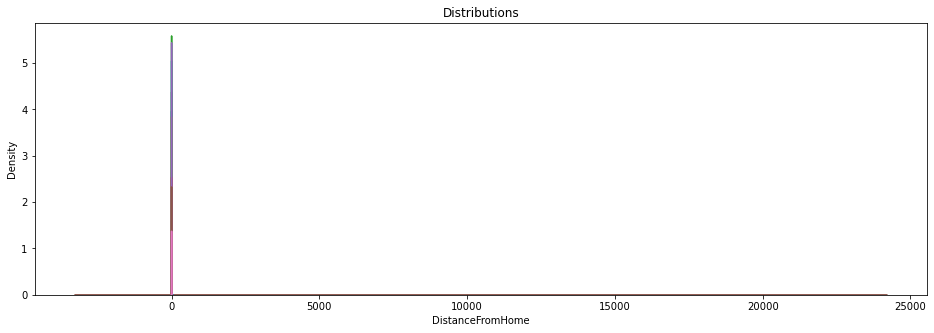

In [10]:
fig, a = plt.subplots(ncols=1, figsize=(16, 5))
a.set_title("Distributions")
for col in data_pred_columns_list:
    sns.kdeplot(attrition_pred[col], ax=a)
plt.show()

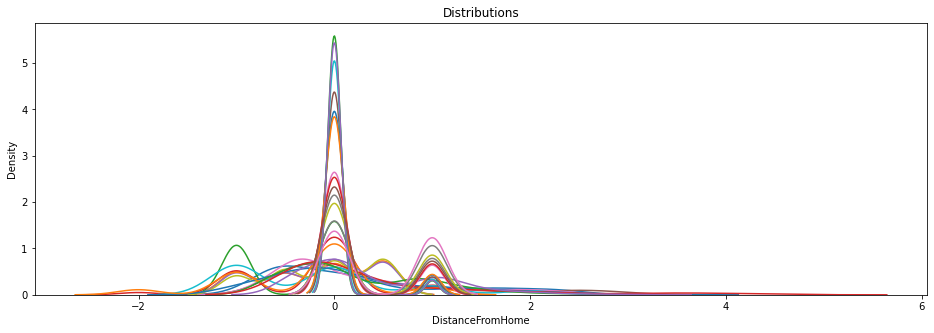

In [11]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler, MinMaxScaler,RobustScaler

# scaler = MaxAbsScaler()
# scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler = RobustScaler()

scaled_df = scaler.fit_transform(attrition_pred[data_pred_columns_list])
scaled_df = pd.DataFrame(scaled_df, columns=data_pred_columns_list)

fig, a = plt.subplots(ncols=1, figsize=(16, 5))
a.set_title("Distributions")
for col in scaled_df.columns:
    sns.kdeplot(scaled_df[col], ax=a)
plt.show()


In [12]:
attrition_pred = scaled_df

### création du model

In [13]:
X_pred = attrition_pred

X = attrition_train[data_pred_columns_list]
y = attrition_train['Attrition']

In [14]:
y

0        No
1        No
2        No
3        No
4        No
       ... 
1095     No
1096     No
1097     No
1098     No
1099    Yes
Name: Attrition, Length: 1100, dtype: object

In [15]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [16]:
my_model = LogisticRegressionCV(Cs = 10, cv=5, penalty = 'l2',solver='liblinear')

In [17]:
my_model.fit(X, y)

LogisticRegressionCV(cv=5, solver='liblinear')

### Predictions

In [18]:
prediction = my_model.predict(X)

In [19]:
proba = my_model.predict_proba(X)[:,1]

In [20]:
new_list = []
arr = proba.tolist()

for i,x in enumerate(arr):
    new_list.append(x)
        
df_proba =pd.DataFrame(columns=['proba'])
df_proba['proba'] = new_list

In [24]:
attrition_train['EmployeeNumber'] = attrition_train_init['EmployeeNumber']

In [25]:
df_pred = pd.DataFrame(data = prediction, columns = ['Prediction'])

In [27]:
df_final= pd.DataFrame(data = attrition_train['EmployeeNumber'], columns = ['EmployeeNumber'])

In [28]:
df_final['Prediction'] = df_pred
df_final['AttritionScore'] = df_proba

In [29]:
df_final.Prediction.value_counts()

No     1016
Yes      84
Name: Prediction, dtype: int64

### Définir la taille du programme d'accompagnement

In [ ]:
#  le programme doit concerner entre 10 et 100 personnes
df_yes = df_final[df_final['Prediction']== 'Yes']
L = len(df_yes)

if L >100:
    nb_participants = 100
    print("Il y aura {} participants à ce programme".format(nb_participants))
elif L < 10:
    print("Il n'y a pas assez de participant pour ce programme")
else:
    nb_participants = L
    print("Il y aura {} participants à ce programme".format(nb_participants))



### Définir la liste des participants au programme

In [ ]:
df_final = df_final.sort_values(by = 'AttritionScore', ascending = False)

df_participants = df_final.head(nb_participants)

print("les participants à ce programme sont les employés numéro : ",list(df_participants['EmployeeNumber']))

In [ ]:
df_final.to_csv('/home/apprenant/PycharmProjects/Brief-10-Employees-Turnover/data/df_final.csv')